In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from astropy.io import fits
import scipy.stats
from loess.loess_2d import loess_2d
from matplotlib.patches import Circle
from astropy.cosmology import Planck18 as cosmo
import astropy.units as u
import cmasher as cmr
plt.rcParams.update({'font.size': 14})

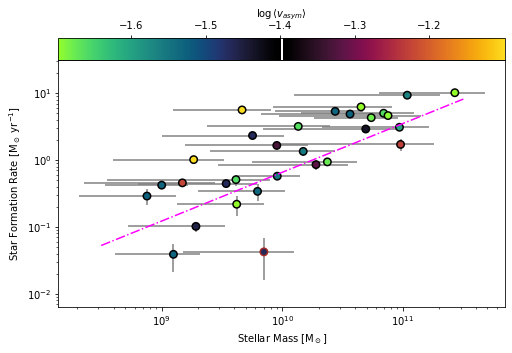

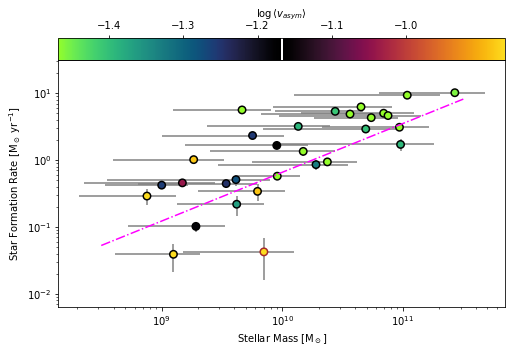

In [3]:
sample = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_M2.csv")
sample = sample.dropna()
sample = sample[(sample["v_asym_tot"]/sample["v_asym_tot_err"])>3]
bpt = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_BPT.csv")
SF = bpt[bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==1]
sample = sample[sample["MAGPIID"].isin(SF["MAGPIID"])]
SF = SF[SF["MAGPIID"].isin(sample['MAGPIID'])]
prospect = pd.read_csv("MAGPI_ProSpectCat_v0.1.csv")
prospect = prospect[prospect["MAGPIID"].isin(sample["MAGPIID"])]
k35 = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_k24_k35.csv")
k35 = k35[k35["MAGPIID"].isin(sample['MAGPIID'])]
env = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_env.csv")
env = env[env["MAGPIID"].isin(sample["MAGPIID"])]
xx = np.logspace(8.5,11.5, 55)
MS = (xx**0.730)*(10**-7.482)
SFR = SF["SFR, dust corrected"].to_numpy()
mass = prospect["StellarMass_median"].to_numpy()
mass_err = prospect["StellarMass_16"].to_numpy()
SFR_err =SF["SFR_err"].to_numpy()
asym = sample["v_asym_tot"].to_numpy()

D_SFR = (np.log10(SFR) - np.log10(mass**(0.730)*(10**(-7.482)))) > -1
colors=[]
for i in D_SFR:
    if i:
        colors.append("k")
    else:
        colors.append("brown")
colors=np.array(colors)

plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots(figsize=(8,5))
p=ax.scatter(mass,SFR, zorder=2,ec=colors,s=55,linewidths=1.5, c=np.log10(asym),vmin=np.log10(0.04)-0.3,vmax=np.log10(0.04)+0.3,cmap="cmr.wildfire")
ax.errorbar(mass,SFR,xerr=mass_err, yerr=SFR_err, c='gray', zorder=1, ls="")
ax.plot(xx,MS, c="magenta", ls="dashdot", label="MS (z~0.35)")
#ax.plot(xx,MS*0.1, c="magenta", ls="dashdot")
#ax.plot(xx,MS*10, c="magenta", ls="dashdot")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(10**(-2.2),10**(1.5))
ax.set_xlabel("Stellar Mass [M$_\odot$]")
ax.set_ylabel("Star Formation Rate [M$_\odot$ yr$^{-1}$]")
cbar = plt.colorbar(p,ax=ax, pad=0,fraction=0.09,label=r"$\log \langle v_{asym} \rangle$",location="top",ticks=[-1.6,-1.5,-1.4,-1.3,-1.2])
cbar.ax.plot([np.log10(0.04),np.log10(0.04)],[0,1],"w", lw=2)
plt.savefig("plots/SFMS_asym_10Myrs.pdf", bbox_inches="tight")

asym = k35["k35_2re"].to_numpy()
fig,ax = plt.subplots(figsize=(8,5))
p=ax.scatter(mass,SFR, zorder=2,ec=colors,s=55,linewidths=1.5, c=np.log10(asym),vmin=np.log10(0.068)-0.3,vmax=np.log10(0.068)+0.3, cmap="cmr.wildfire")
ax.errorbar(mass,SFR,xerr=mass_err, yerr=SFR_err, c='gray', zorder=1, ls="")
ax.plot(xx,MS, c="magenta", ls="dashdot", label="MS (z~0.35)")
#ax.plot(xx,MS*0.1, c="magenta", ls="dashdot")
#ax.plot(xx,MS*10, c="magenta", ls="dashdot")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(10**(-2.2),10**(1.5))
ax.set_xlabel("Stellar Mass [M$_\odot$]")
ax.set_ylabel("Star Formation Rate [M$_\odot$ yr$^{-1}$]")
cbar = plt.colorbar(p,ax=ax, pad=0,fraction=0.09,label=r"$\log \langle v_{asym} \rangle$", location="top", ticks=[-1.6,-1.5,-1.4,-1.3,-1.2,-1.1,-1.0])
cbar.ax.plot([np.log10(0.068),np.log10(0.068)],[0,1],"w", lw=2)
plt.savefig("plots/SFMS_asym_Ha_SAMI.pdf", bbox_inches="tight")

In [4]:
df = pd.DataFrame({"MAGPIID":sample["MAGPIID"],
                   "z":prospect["z"].to_numpy(),
                   "HaLum x10^40":SF["SFR, dust corrected"].to_numpy()*(10**(-1.27)),
                   "Stellar Mass":np.log10(prospect["StellarMass_median"].to_numpy()),
                   #"SFR_100":prospect["SFRburst_median"].to_numpy(),
                   "SFR_10":SF["SFR, dust corrected"].to_numpy(),
                   "Ionisation Source":SF["type(sf+AGN=0, sf=1, sy=2, ln=3)"].to_numpy(),
                   "Group_N":env["N_Gals"].to_numpy(),
                   "Central?":env["BCG?"].to_numpy()==1,
                   "AsymmetricGas?":sample["v_asym_tot"]>0.04,
                   #"AsymmetricStars":sample_gas_stars["v_asym_s_2re:"]>0.04,
                   "StarForming?":colors=="k",
                   "AsymmetricSAMI?":np.array(k35["k35_2re"]>0.068)
                   })
df

,MAGPIID,z,HaLum x10^40,Stellar Mass,SFR_10,Ionisation Source,Group_N,Central?,AsymmetricGas?,StarForming?,AsymmetricSAMI?
0,1201302222,0.2992,0.024540,9.172336,0.456965,1.0,2.0,True,True,True,True
1,1202197197,0.2913,0.502379,11.035392,9.354732,1.0,2.0,True,False,True,False
2,1203076068,0.3062,0.288174,10.438424,5.366055,1.0,23.0,False,False,True,False
3,1203152196,0.2802,0.002094,9.098226,0.038985,1.0,4.0,False,False,True,True
4,1203247089,0.3059,0.022673,9.000945,0.422195,1.0,23.0,False,False,True,False
5,1203287367,0.3079,0.018312,9.795008,0.340979,1.0,23.0,False,False,True,True
7,1204198199,0.3156,0.092164,10.980109,1.716172,1.0,3.0,True,True,True,False
8,1205196165,0.2917,0.030868,9.958510,0.574794,1.0,4.0,False,False,True,False
10,1206151090,0.3249,0.125314,9.753645,2.333453,1.0,11.0,False,False,True,False
11,1206243216,0.3244,0.002277,9.847748,0.042402,1.0,11.0,False,False,False,True


In [5]:
new_sample = pd.read_csv("new_kinemetry_sample.csv")
new_sample = new_sample[new_sample["v_asym_stars"]/new_sample["v_asym_stars_err"]>1]
#new_sample = new_sample[new_sample["v_asym_gas"]/new_sample["v_asym_gas_err"]>3]
prospect = pd.read_csv("MAGPI_ProSpectCat_v0.1.csv")
prospect = prospect[prospect["MAGPIID"].isin(new_sample["MAGPIID"])]
bpt = pd.read_csv("new_kinemetry_sample_BPT.csv")
bpt = bpt[bpt["MAGPIID"].isin(new_sample["MAGPIID"])]

/var/folders/nl/v2f_l95j0jx701ctszdv_thr0000gp/T/ipykernel_38291/4168828037.py:4: RuntimeWarning: divide by zero encountered in log10
  D_SFR = (np.log10(bpt["SFR, dust corrected"].to_numpy()) - np.log10(prospect["StellarMass_median"].to_numpy())**(0.730)*(10**(-7.482))) > -1


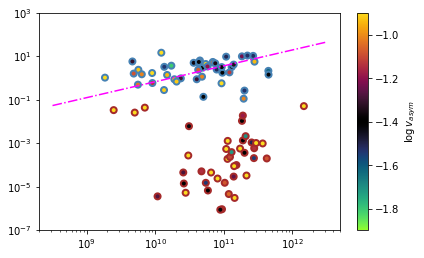

In [6]:
xx = np.logspace(8.5,12.5, 55)
MS = (xx**0.730)*(10**-7.482)

D_SFR = (np.log10(bpt["SFR, dust corrected"].to_numpy()) - np.log10(prospect["StellarMass_median"].to_numpy())**(0.730)*(10**(-7.482))) > -1
colors=[]
for i in D_SFR:
    if i:
        colors.append("steelblue")
    else:
        colors.append("brown")
colors=np.array(colors)
fig,ax = plt.subplots()
p=ax.scatter(prospect["StellarMass_median"],bpt['SFR, dust corrected'],ec=colors,c=np.log10(new_sample["v_asym_stars"].to_numpy()),
             cmap="cmr.wildfire", vmin=np.log10(0.04)-0.5, vmax=np.log10(0.04)+0.5, lw=2)
ax.plot(xx,MS,ls="dashdot",c="magenta")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylim(1e-7,1e3)
plt.colorbar(p,ax=ax,fraction=0.05,pad=0.05, label=r"$\log v_{asym}$")
plt.savefig("plots/new_SFMS.pdf",bbox_inches="tight")

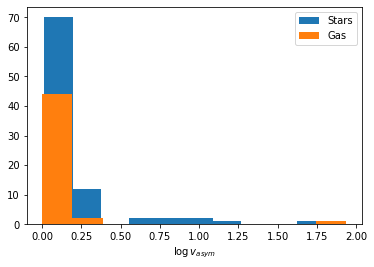

In [7]:
fig,ax=plt.subplots()
ax.hist(new_sample["v_asym_stars"].to_numpy(), label="Stars")
ax.hist(new_sample["v_asym_gas"].to_numpy(), label="Gas")
ax.set_xlabel(r"$\log v_{asym}$")
ax.legend()
plt.savefig("plots/v_asym_hist.pdf",bbox_inches="tight")

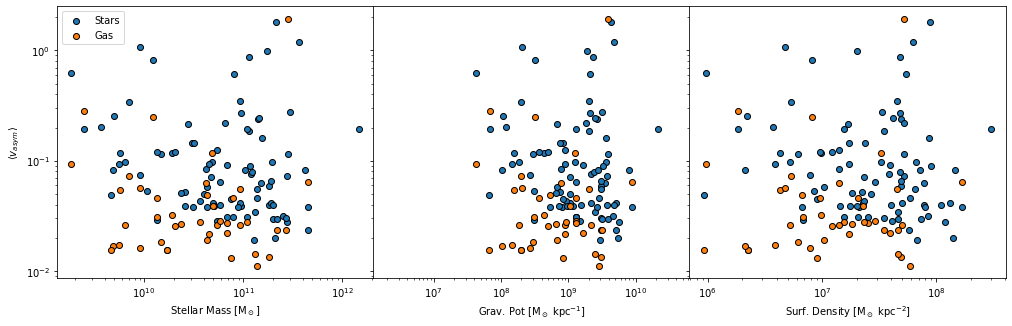

In [8]:
fig,(ax1,ax2,ax3) = plt.subplots(1,3, sharey="row",figsize=(17,5))
ax1.scatter(prospect["StellarMass_median"].to_numpy(), new_sample["v_asym_stars"], ec="k", label="Stars")
ax1.scatter(prospect["StellarMass_median"].to_numpy(), new_sample["v_asym_gas"], ec="k",label="Gas")
ax2.scatter(prospect["StellarMass_median"].to_numpy()/bpt["re, kpc"].to_numpy(), new_sample["v_asym_stars"], ec="k",label="Stars")
ax2.scatter(prospect["StellarMass_median"].to_numpy()/bpt["re, kpc"].to_numpy(), new_sample["v_asym_gas"], ec="k", label="Gas")
ax3.scatter(prospect["StellarMass_median"].to_numpy()/bpt["re, kpc"].to_numpy()**2, new_sample["v_asym_stars"], ec="k",label="Stars")
ax3.scatter(prospect["StellarMass_median"].to_numpy()/bpt["re, kpc"].to_numpy()**2, new_sample["v_asym_gas"], ec="k", label="Gas")
ax1.set_xscale("log")
ax1.set_yscale("log")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax3.set_xscale("log")
ax1.set_ylabel(r"$\langle v_{asym} \rangle$")
ax1.set_xlabel(r"Stellar Mass [M$_\odot$]")
ax2.set_xlabel(r"Grav. Pot [M$_\odot$ kpc$^{-1}$]")
ax3.set_xlabel(r"Surf. Density [M$_\odot$ kpc$^{-2}$]")
ax1.legend(loc='upper left')
#ax3.legend()
ax2.set_xlim(10**(6.1),10**(10.8))
plt.subplots_adjust(wspace=0)
plt.show()

In [9]:
file = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_M2.csv")
file = file[file["v_asym_tot"]/file["v_asym_tot_err"]>3]
file = file.dropna()
f = file[file["v_asym_05re"]>0.04]
f = f[f["v_asym_15re"]>0.04]
print(len(f)/len(file))
print(len(file[file["v_asym_05re"]<file["v_asym_15re"]])/len(file))

0.15217391304347827
0.6739130434782609


In [10]:
len(file)

46

In [11]:
file = pd.read_csv("MAGPI_Emission_Lines/old_csv/kinemetry_sample_M1.csv")
file = file[file["v_asym_tot"]/file["v_asym_tot_err"]>3]
file = file.dropna()
len(file[file["v_asym_15re"]>file["v_asym_05re"]])/len(file)

0.9111111111111111

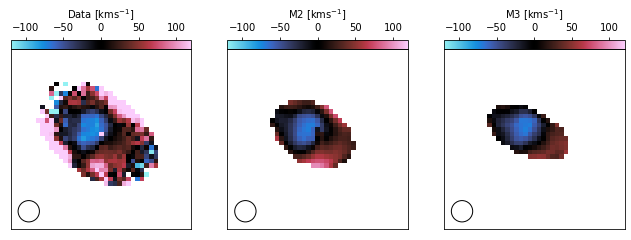

In [12]:
f = "MAGPI_Emission_Lines/MAGPI2310/plots4/MAGPI2310167176_velocity/MAGPI2310167176_z_0.2832_Ha_kinemetry.fits"
file = fits.open(f)
z = 0.2832
pix = cosmo.luminosity_distance(z).to(u.kpc).value
pix = np.radians((0.65/2)/3600)*pix
fig,(ax1,ax2,ax3) = plt.subplots(1,3, figsize=(11,4))
p1=ax1.imshow(file[2].data,vmin=-120,vmax=120,cmap="cmr.redshift")
p2=ax2.imshow(file[5].data,vmin=-120,vmax=120,cmap="cmr.redshift")
p3=ax3.imshow(file[6].data,vmin=-120,vmax=120,cmap="cmr.redshift")
for p,ax,label in zip([p1,p2,p3],[ax1,ax2,ax3],[r"Data [kms$^{-1}$]",r"M2 [kms$^{-1}$]",r"M3 [kms$^{-1}$]"]):
    plt.colorbar(p,ax=ax, label=label,pad=0.0,fraction=0.05, location="top")
    ax.set_yticks([])
    ax.set_xticks([])
    ax.set_xlim(17,57)
    ax.set_ylim(17,57)
    ax.add_patch(Circle(xy=(21,21),radius=pix,ec="k",fc="none"))
plt.savefig("MAGPI_Emission_Lines/plots/old_plots/M2_M3_washout.pdf",bbox_inches="tight")
file.close()

0.1111111111111111


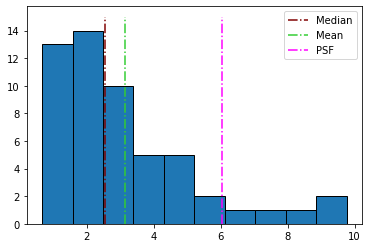

In [13]:
file = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_k24_k35.csv")
pix = np.radians((0.65)/3600)*cosmo.luminosity_distance(z=0.35).to(u.kpc).value
print(len(file[file["r_dist"]>pix])/len(file))
fig,ax = plt.subplots()
ax.hist(file["r_dist"].to_numpy(), ec="k")
ax.vlines(np.median(file["r_dist"].to_numpy()),colors="maroon", ymin=0,ymax=15,ls="dashdot", label="Median")
ax.vlines(np.mean(file["r_dist"].to_numpy()),colors="limegreen", ymin=0,ymax=15,ls="dashdot", label="Mean")
ax.vlines(pix,colors="magenta", ymin=0,ymax=15,ls="dashdot", label="PSF")
ax.legend()
plt.savefig("MAGPI_Emission_Lines/plots/old_plots/r_dist_distribution.pdf",bbox_inches="tight")

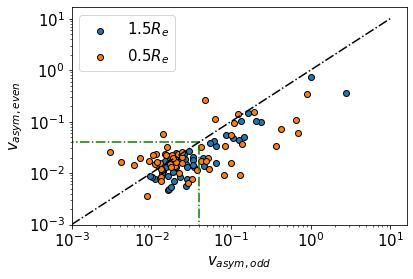

In [14]:
plt.rcParams.update({'font.size': 15})
fig,ax = plt.subplots()
ax.scatter(file["k35_15re"]/2,file["k24_15re"]/2,ec="k",label=r"$1.5R_e$")
ax.scatter(file["k35_05re"]/2,file["k24_05re"]/2,ec="k",label=r"$0.5R_e$")
ax.vlines(0.04,ymin=10**(-3.5),ymax=0.04,colors="g",ls="dashdot")
ax.hlines(0.04,xmin=10**(-3.1),xmax=0.04,colors='g',ls="dashdot")
ax.plot(np.logspace(-3,1),np.logspace(-3,1),ls="dashdot",color="k")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$v_{asym,even}$")
ax.set_xlabel(r"$v_{asym,odd}$")
ax.set_xlim(10**(-3.0))
ax.set_ylim(10**(-3.0))
ax.legend()
plt.savefig("MAGPI_Emission_Lines/plots/old_plots/M2_even_contribution.pdf",bbox_inches="tight")

In [15]:
file = pd.read_csv("new_kinemetry_sample.csv")
#file = file.dropna()
bpt = pd.read_csv("new_kinemetry_sample_BPT.csv")
bpt = bpt[bpt["MAGPIID"].isin(file["MAGPIID"])]
file[bpt['type(sf+AGN=0, sf=1, sy=2, ln=3)']==2]

,MAGPIID,v_asym_gas,v_asym_gas_err,v_asym_stars,v_asym_stars_err,PA_gas (1Re),PA_stars (1Re),DeltaPA (1Re)
14,1205093221,0.055568,0.012821,0.344658,0.133225,0.434022,15.816850,15.382828
24,1207128248,0.046041,0.003312,0.030771,0.005996,-35.244612,-14.652705,20.591908
31,1501176107,0.000000,0.000000,0.097373,0.008937,-17.784241,-7.946400,9.837841
49,1511197198,0.000000,0.000000,0.023756,0.003760,56.004621,-84.245049,140.249671
79,2301290261,0.000000,0.000000,0.050337,0.007612,2.177150,-41.395105,43.572254
81,2302197233,NaN,NaN,0.038473,0.003948,NaN,105.879741,NaN
90,2307145281,NaN,NaN,0.065424,0.010177,NaN,78.438826,NaN
93,2307228105,0.064067,0.019032,0.037754,0.006001,-46.833780,-51.600621,4.766841


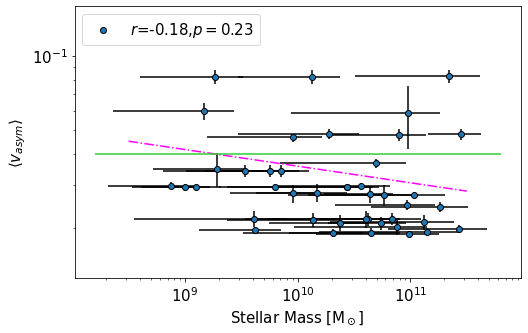

In [16]:
file = pd.read_csv("MAGPI_Emission_Lines/kinemetry_sample_M2.csv")
file = file.dropna()
file = file[file["v_asym_tot"]/file["v_asym_tot_err"]>3]
prospect = pd.read_csv("MAGPI_ProSpectCat_v0.1.csv")
prospect=prospect[prospect["MAGPIID"].isin(file["MAGPIID"])]
pearson = scipy.stats.pearsonr(np.log10(prospect["StellarMass_median"].to_numpy()),np.log10(file['v_asym_tot'].to_numpy()))
fit = scipy.stats.linregress(np.log10(prospect["StellarMass_median"].to_numpy()),np.log10(file['v_asym_tot'].to_numpy()))
x = np.logspace(8.5,11.5)
fig,ax = plt.subplots(figsize=(8,5))
ax.scatter(prospect["StellarMass_median"].to_numpy(),file["v_asym_tot"].to_numpy(),ec="k",zorder=2, label=r"$r$="+f"{pearson[0]:.2f}"+r",$p=$"+f"{pearson[1]:.2f}")
ax.errorbar(prospect["StellarMass_median"].to_numpy(),file["v_asym_tot"].to_numpy(),xerr=prospect["StellarMass_16"].to_numpy(),yerr=file["v_asym_tot_err"].to_numpy(),fmt=".k",zorder=1)
ax.plot(x,(x**fit[0])*(10**fit[1]),ls="dashdot",c="magenta")
ax.hlines(y=0.04,xmin=10**(8.2),xmax=10**(11.8),colors="limegreen")
ax.set_xscale("log")
ax.set_yscale("log")
ax.set_ylabel(r"$\langle v_{asym} \rangle$")
ax.set_xlabel(r"Stellar Mass [M$_\odot$]")
ax.legend(loc="upper left")
ax.set_ylim(10**(-1.9),10**(-0.8))
plt.savefig("MAGPI_Emission_Lines/plots/old_plots/v_asym-stellar-mass.pdf",bbox_inches="tight")

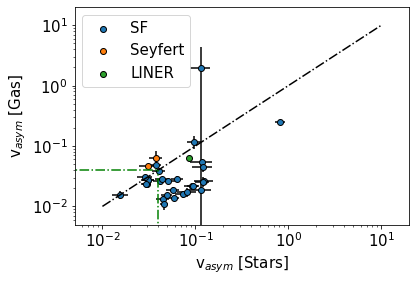

In [17]:
file = pd.read_csv("new_kinemetry_sample.csv")
file = file[file["v_asym_stars"]/file["v_asym_stars_err"]>3]
#file = file[file["v_asym_stars"]/file["v_asym_stars_err"]>3]
#file = file[file["v_asym_gas"]/file["v_asym_gas_err"]>3]
bpt = pd.read_csv("new_kinemetry_sample_BPT.csv")
sf = file[file["MAGPIID"].isin(bpt[bpt["type(sf=1, sy=2, ln=3) SII"]==1]["MAGPIID"])]
sy = file[file["MAGPIID"].isin(bpt[bpt["type(sf=1, sy=2, ln=3) SII"]==2]["MAGPIID"])]
ln = file[file["MAGPIID"].isin(bpt[bpt["type(sf=1, sy=2, ln=3) SII"]==3]["MAGPIID"])]
comp = file[file["MAGPIID"].isin(bpt[bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==0]["MAGPIID"])]
fig,ax = plt.subplots()
ax.scatter(sf["v_asym_stars"],sf["v_asym_gas"],label="SF",ec="k",zorder=2)
ax.scatter(sy["v_asym_stars"],sy["v_asym_gas"],label="Seyfert",ec="k",zorder=2)
ax.errorbar(sf["v_asym_stars"],sf["v_asym_gas"],xerr=sf['v_asym_stars_err'],yerr=sf["v_asym_gas_err"],fmt='.k',zorder=1)
ax.errorbar(sy["v_asym_stars"],sy["v_asym_gas"],xerr=sy['v_asym_stars_err'],yerr=sy["v_asym_gas_err"],fmt='.k',zorder=1)
ax.scatter(ln["v_asym_stars"],ln["v_asym_gas"],label="LINER",ec="k")
# ax.scatter(comp["v_asym_stars"],comp["v_asym_gas"],label="Comp",ec="k",zorder=2)
# ax.errorbar(comp["v_asym_stars"],comp["v_asym_gas"],xerr=comp['v_asym_stars_err'],yerr=comp["v_asym_gas_err"],fmt='.k',zorder=1)
# ax.scatter(file["v_asym_stars"][bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==2],file["v_asym_gas"][bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==2],label="Seyfert",ec="k")
# ax.scatter(file["v_asym_stars"][bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==3],file["v_asym_gas"][bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==3],label="LINER")
# ax.scatter(file["v_asym_stars"][bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==0],file["v_asym_gas"][bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==0],label="Comp",ec="k")
ax.plot(np.linspace(1e-2,1e1), np.linspace(1e-2,1e1), ls='dashdot', c="k")
ax.vlines(0.04,ymin=10**(-3.5),ymax=0.04,colors="g",ls="dashdot")
ax.hlines(0.04,xmin=10**(-3.1),xmax=0.04,colors='g',ls="dashdot")
ax.set_yscale("log")
ax.set_xscale("log")
ax.set_xlabel(r"v$_{asym}$ [Stars]")
ax.set_ylabel(r"v$_{asym}$ [Gas]")
ax.set_xlim(10**(-2.3),10**(1.3))
ax.set_ylim(10**(-2.3),10**(1.3))
ax.legend()
plt.savefig("plots/SF_AGN_gas_vs_stars.pdf",bbox_inches="tight")

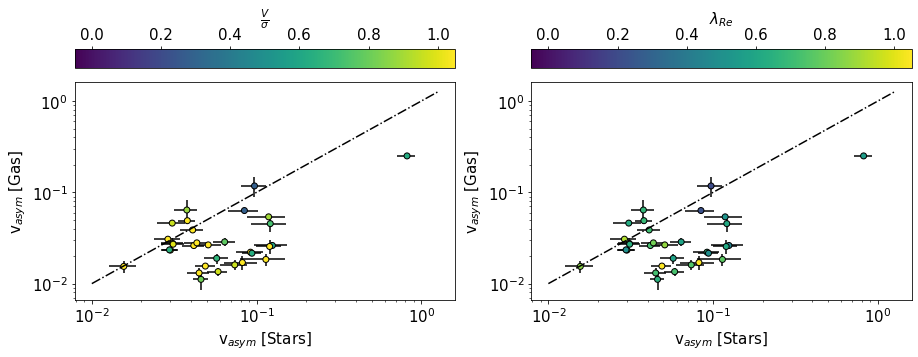

In [39]:
file = pd.read_csv("new_kinemetry_sample.csv")
file = file[file["v_asym_stars"]/file["v_asym_stars_err"]>3]
file = file[file["v_asym_gas"]/file["v_asym_gas_err"]>3]

prospect = pd.read_csv("MAGPI_ProSpectCat_v0.1.csv")
bpt = pd.read_csv("new_kinemetry_sample_BPT.csv")
stellar_pop = pd.read_csv("stellar_pops/MAGPI_ApertureSpectra_StellarPops_V1.0_SPV.csv")

stellar_pop = stellar_pop[stellar_pop["MAGPIID"].isin(file["MAGPIID"])]
age = stellar_pop["logage_MW_2re"].to_numpy()
prospect = prospect[prospect["MAGPIID"].isin(file["MAGPIID"])]
bpt = bpt[bpt["MAGPIID"].isin(file["MAGPIID"])]

pot= np.log10(prospect["StellarMass_median"].to_numpy()) - np.log10(bpt["re, kpc"])
SFR = bpt["SFR, dust corrected"].to_numpy()
l_re = pd.read_csv("lambda_Re_seeing_corrected.csv")
l_re = l_re[l_re["MAGPIID"].isin(file["MAGPIID"])]
v_sigma = l_re["corr_v_on_sigma"].to_numpy()
lre = l_re["corr_lambda_re"].to_numpy()
x = np.logspace(-2,0.1)

fig,(ax1,ax2)=plt.subplots(1,2,figsize=(15,5))
p1=ax1.scatter(file["v_asym_stars"].to_numpy(),file["v_asym_gas"].to_numpy(),c=v_sigma,ec="k",zorder=2,vmin=-0.05,vmax=1.05)
ax1.errorbar(file["v_asym_stars"].to_numpy(),file["v_asym_gas"].to_numpy(),xerr=file["v_asym_stars_err"].to_numpy(),
            yerr=file["v_asym_gas_err"].to_numpy(),fmt=".k",zorder=1)
p2=ax2.scatter(file["v_asym_stars"].to_numpy(),file["v_asym_gas"].to_numpy(),c=lre,ec="k",zorder=2,vmin=-0.05,vmax=1.05)
ax2.errorbar(file["v_asym_stars"].to_numpy(),file["v_asym_gas"].to_numpy(),xerr=file["v_asym_stars_err"].to_numpy(),
            yerr=file["v_asym_gas_err"].to_numpy(),fmt=".k",zorder=1)
for p,ax,label in zip([p1,p2],[ax1,ax2],[r"$\frac{V}{\sigma}$",r"$\lambda_{Re}$"]):
    ax.set_xscale("log")
    ax.set_yscale("log")
    ax.set_ylabel(r"v$_{asym}$ [Gas]")
    ax.set_xlabel(r"v$_{asym}$ [Stars]")
    ax.plot(x,x,ls="dashdot",c="k")
    plt.colorbar(p,ax=ax,label=label,location="top")
plt.savefig("plots/v_asym_age.pdf",bbox_inches="tight")

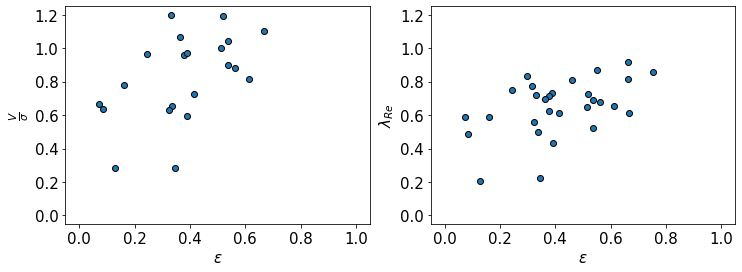

In [47]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,4))
ax1.scatter(l_re["ellip"],l_re["corr_v_on_sigma"],ec="k")
ax2.scatter(l_re["ellip"],l_re["corr_lambda_re"],ec="k")
for ax,label in zip([ax1,ax2],[r"$\frac{V}{\sigma}$",r"$\lambda_{Re}$"]):
    ax.set_xlim(-0.05,1.05)
    ax.set_ylim(-0.05,1.25)
    ax.set_xlabel(r"$\epsilon$")
    ax.set_ylabel(label)
plt.show()

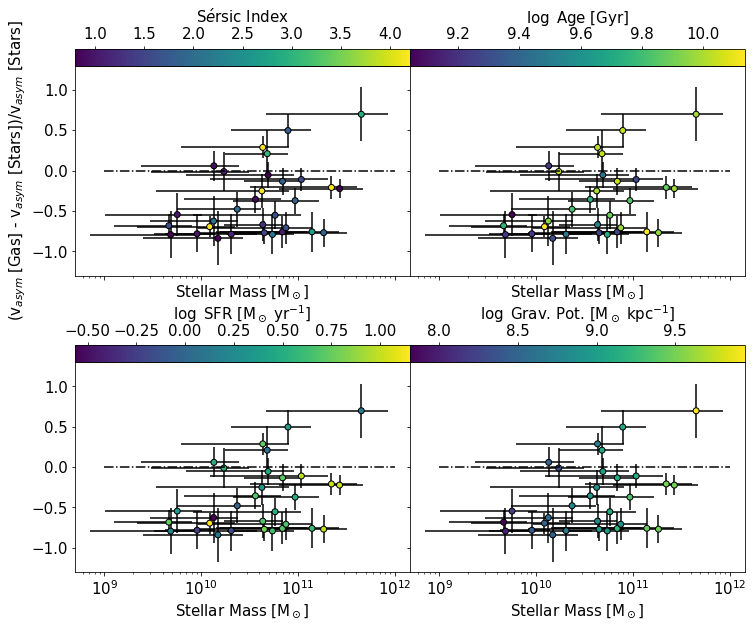

In [48]:
d_vasym = (file["v_asym_gas"] - file["v_asym_stars"])/ file["v_asym_stars"]
d_vasym_err = np.sqrt((file["v_asym_stars_err"]/file["v_asym_stars"])**2 + (file["v_asym_gas_err"]/file["v_asym_gas"])**2)
galfit = pd.read_csv("MAGPI_GalfitSersicCat_v0.1.csv")
galfit = galfit[galfit["MAGPIID"].isin(file["MAGPIID"])]
n = galfit["n"].to_numpy()

fig,((ax1,ax2),(ax3,ax4))=plt.subplots(2,2,sharey="row",sharex="col",figsize=(12,10))
p1=ax1.scatter(prospect["StellarMass_median"].to_numpy(),d_vasym,c=n,ec="k",zorder=2,vmin=0.8,vmax=4.2)
ax1.errorbar(prospect["StellarMass_median"].to_numpy(),d_vasym,xerr=prospect["StellarMass_16"].to_numpy(),
            yerr=d_vasym_err,fmt=".k",zorder=1)
p2=ax2.scatter(prospect["StellarMass_median"].to_numpy(),d_vasym,c=age,ec="k",zorder=2)
ax2.errorbar(prospect["StellarMass_median"].to_numpy(),d_vasym,xerr=prospect["StellarMass_16"].to_numpy(),
            yerr=d_vasym_err,fmt=".k",zorder=1)
p3=ax3.scatter(prospect["StellarMass_median"].to_numpy(),d_vasym,c=np.log10(SFR),ec="k",zorder=2)
ax3.errorbar(prospect["StellarMass_median"].to_numpy(),d_vasym,xerr=prospect["StellarMass_16"].to_numpy(),
            yerr=d_vasym_err,fmt=".k",zorder=1)
p4=ax4.scatter(prospect["StellarMass_median"].to_numpy(),d_vasym,c=pot,ec="k",zorder=2)
ax4.errorbar(prospect["StellarMass_median"].to_numpy(),d_vasym,xerr=prospect["StellarMass_16"].to_numpy(),
            yerr=d_vasym_err,fmt=".k",zorder=1)
for p,ax,label in zip([p1,p2,p3,p4],[ax1,ax2,ax3,ax4], [r"S$\'{e}$rsic Index",r"$\log$ Age [Gyr]",r"$\log$ SFR [M$_\odot$ yr$^{-1}$]",
                                                        r"$\log$ Grav. Pot. [M$_\odot$ kpc$^{-1}$]"]):
    ax.set_xscale("log")
    #ax.set_yscale("log")
    ax1.set_ylabel(r"(v$_{asym}$ [Gas] - v$_{asym}$ [Stars])/v$_{asym}$ [Stars]")
    ax.hlines(y=0,xmin=1e9,xmax=1e12,ls="dashdot",colors="k")
    ax.set_ylim(-1.3,1.3)
    plt.colorbar(p,ax=ax,label=label,location="top",pad=0)
ax1.set_xlabel(r"Stellar Mass [M$_\odot$]")
ax2.set_xlabel(r"Stellar Mass [M$_\odot$]")
ax3.set_xlabel(r"Stellar Mass [M$_\odot$]")
ax4.set_xlabel(r"Stellar Mass [M$_\odot$]")
plt.subplots_adjust(wspace=0)
plt.savefig("plots/d_v_asym_age.pdf",bbox_inches="tight")

In [20]:
bpt[bpt["type(sf+AGN=0, sf=1, sy=2, ln=3)"]==2]

,MAGPIID,Ha,Ha_err,Hb,[OI]6302,[OIII]5008,[NII]6585,[SII]6718,"type(sf+AGN=0, sf=1, sy=2, ln=3)","type(sf=1, sy=2, ln=3) SII","SFR, dust corrected",SFR_err,"re, arcsec","re, kpc"
24,1207128248,54482.239962,1.362968e-16,13039.814691,3010.466095,114111.144081,33915.886697,17381.254858,2.0,2.0,2.399845,0.262740,1.473,61.846112
93,2307228105,2891.656504,6.536140e-16,240.902080,324.629828,803.219130,5164.785388,879.259035,2.0,2.0,1.396916,1.384375,1.177,51.800269


In [21]:
f = open("MAGPI_master_emission_lines.tbl","r")
file = []
for i in f:
    file.append(i)
f.close()
hdr = file[4].split()
data = []
for i in range(5,len(file)):
    data.append(file[i].split())
data = np.array([list(x) for x in zip(*data)]).T
data = pd.DataFrame(data,columns=hdr)
data.to_csv("MAGPI_master_emission_lines.csv",index=False)
data = pd.read_csv("MAGPI_master_emission_lines.csv").to_numpy()
max_ln = []
max_ln_err = []
gal = []
for i in range(len(data)):
    if data[i,2]==-1:
        continue
    x = np.where(data[i]==np.max(data[i,4:]))[0][0]
    #print(f"MAGPI{int(data[i,0]):.0f} Brightest Line is {hdr[x]}")
    gal.append(int(data[i,0]))
    max_ln.append(hdr[x]+'_F')
    max_ln_err.append(hdr[x]+'_FERR')
df = pd.DataFrame({"MAGPIID":gal,
                   "MAX_LINE":max_ln,
                   "MAX_LINE_ERR":max_ln_err})
df.to_csv("MAGPI_Emission_Max_Line.csv",index=False)

In [22]:
def clean_images(img, pa, a, b, img_err=None):
    y0, x0 = img.shape
    y0, x0 = y0 / 2, x0 / 2
    pa = pa - 90
    pa = np.radians(pa)
    for i in range(len(img[:, 0])):
        for j in range(len(img[0, :])):
            side1 = (((j - x0) * np.cos(pa)) + ((i - y0) * np.sin(pa))) ** 2 / (a ** 2)
            side2 = (((j - x0) * np.sin(pa)) - ((i - y0) * np.cos(pa))) ** 2 / (b ** 2)
            if side1 + side2 > 8:
                img[i, j] = np.nan
            if img_err is not None and abs(img_err[i, j]) < 3:
                img[i, j] = np.nan
    return img

In [23]:
galaxy = 1207128248
file = fits.open("MAGPI"+str(galaxy)+"_1dspec_1.5re.fits")
data = file[1].data
x = np.linspace(4700,9350,len(data))
z = prospect[prospect["MAGPIID"].isin([galaxy])]["z"].to_numpy()[0]
x = x/(1+z)
fig,ax = plt.subplots(figsize=(14,4))
ax.plot(x,data/np.max(data))
ax.vlines(x=3727,ymin=0,ymax=1, ls="dashdot", colors="k")
ax.text(x=3250,y=0.4,s=r"[OII] 3727$\AA$")
ax.vlines(x=3730,ymin=0,ymax=1, ls="dashdot", colors="k")
ax.text(x=3750,y=0.3,s=r"[OII] 3730$\AA$")
ax.vlines(x=5008,ymin=0,ymax=1, ls="dashdot", colors="k")
ax.text(x=5050,y=0.3,s=r"[OIII] 5008$\AA$")
ax.vlines(x=4861,ymin=0,ymax=1, ls="dashdot", colors="k")
ax.text(x=4420,y=0.4,s=r"H$\beta$ 4861$\AA$")
ax.vlines(x=6562,ymin=0,ymax=1, ls="dashdot", colors="k")
ax.text(x=6800,y=0.42,s=r"H$\alpha$ 6562$\AA$")
ax.vlines(x=6585,ymin=0,ymax=1, ls="dashdot", colors="k")
ax.text(x=6800,y=0.23,s=r"[NII] 6585$\AA$")
ax.vlines(x=6718,ymin=0,ymax=1, ls="dashdot", colors="k")
ax.text(x=6800,y=0.34,s=r"[SII] 6718$\AA$")
ax.vlines(x=6302,ymin=0,ymax=1, ls="dashdot", colors="k")
ax.text(x=6800,y=0.31,s=r"[SII] 6733$\AA$")
ax.vlines(x=6733,ymin=0,ymax=1, ls="dashdot", colors="k")
ax.text(x=5800,y=0.4,s=r"[OI] 6733$\AA$")
ax.set_xlim(3200,7300)
ax.set_ylim(0.005,0.455)
ax.set_xlabel(r"Wavelength [$\AA$]")
ax.set_ylabel("Normalised Flux Density")
plt.savefig("plots/spectrum.pdf",bbox_inches="tight")

FileNotFoundError: [Errno 2] No such file or directory: 'MAGPI1207128248_1dspec_1.5re.fits'

In [ ]:
hdr